In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
%matplotlib qt

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog
from datetime import datetime
from datetime import timedelta as dt_timedelta

from renewableopt.data import load_by_day
from renewableopt.optimal_design import SinglePeriodModel, MultiPeriodModel, greedy_battery_control, visualize
from renewableopt.peak_id import timedelta, identify_worst_days
from renewableopt.optimal_design.dispatch import DispatchData
from renewableopt.optimal_design.multi_period import OptimizationError

In [22]:
sources = ["solar", "wind", "geothermal"]
time, load, generation_pu = load_by_day(0, 366, sources=sources)
time = time / 60
dt = timedelta(time)
worst_load, worst_generation_pu = identify_worst_days(time, load, generation_pu, method="peak_load")

In [49]:
print(list(worst_load.keys()))

['peak_206', 'peak_207', 'peak_225', 'peak_209', 'peak_208']


In [50]:
scenario = 'peak_206'
time_hr = time / 60
plt.plot(worst_load[scenario])
plt.figure()
plt.plot(worst_generation_pu[scenario])
plt.legend(sources)

In [56]:
scenario = list(worst_load.keys())[0]
time_one_day = time[:worst_load[scenario].shape[0]]
model = MultiPeriodModel(
    initial_battery_charge=0.5,
    depth_of_discharge=0.1,
    cost_battery_energy=300,
    cost_battery_power=350,
    cost_generation=[1250, 1250, 3500])
#     cost_generation=[1250])
try:
    res = model.minimize_cost(time_one_day, worst_load, worst_generation_pu)
except OptimizationError as err:
    scipy_res = err.result
    raise err

In [57]:
print(f"Battery Capacity {res.E_max:.1f} MWh")
print(f"Battery Power {res.P_battery:.1f} MW")
print(f"Hours of storage: {res.E_max / res.P_battery:.2f} hr")
for i, source in enumerate(sources):
    print(f"{source.capitalize()} Generation: {res.P_generation[i]:.1f} MW")
#     print(f"Geothermal Generation: {res.P_generation[i]:.1f} MW")


Battery Capacity 85.1 MWh
Battery Power 22.6 MW
Hours of storage: 3.76 hr
Solar Generation: 39.5 MW
Wind Generation: 0.0 MW
Geothermal Generation: 66.9 MW


In [31]:
# Potentially interesting plots:
# Aggregated SoC at end of day (mean/std of each month) (of course, this depends on eta)
#     Include also minimum SoC
# SoC over day for the day in each month that reaches minimum battery capacity 
# Amount of renewable generation curtailment (to what degree is this a function of generation source?)

In [33]:
# Is there a good way to store all this data in a single data structure, so that passing it
# to visualization function isn't so onerous?

In [47]:
dispatch = DispatchData.from_greedy(time, load, generation_pu, sources, res)

In [48]:
before_err = visualize.plot_stack(dispatch[len(dispatch) - timesteps_per_day:])

In [90]:
dts_err = dts[:u_batt_err.shape[0]]
last_t = -timesteps_per_day
fig = plt.figure()
plt.plot(dts_err[last_t:], u_batt_err[last_t:])
fig.autofmt_xdate(rotation=80)
fig = plt.figure()
plt.plot(dts_err[last_t:], soc_err[last_t:])
fig.autofmt_xdate(rotation=80)

In [304]:
# gen_full = res.scale_generation(generation_pu, sum_sources=False)
# start_i = err_i - timesteps_per_day
# plot_dispatch_stack(
#     dts[start_i:err_i],
#     load[start_i:err_i],
#     gen_full[start_i:err_i],
#     u_batt_err[start_i:],
#     sources,
#     soc_err[start_i:]
# )

66.86454748778036
66.86454748778034
288
in iter
yieled
in iter
yieled
in iter
yieled
in iter
yieled
done with groupby
Discharge [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Charge [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38
 39 40 41 42 43 44 45]
Full [ 46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209]
Discharge [210 211 212 213 214 215 216 217 218 219

In [222]:
for val, group in groupby(charges):
    print(val, list(group))

Discharge ['Discharge', 'Discharge', 'Discharge', 'Discharge', 'Discharge', 'Discharge', 'Discharge', 'Discharge', 'Discharge', 'Discharge', 'Discharge', 'Discharge', 'Discharge', 'Discharge', 'Discharge']
Charge ['Charge', 'Charge', 'Charge', 'Charge', 'Charge', 'Charge', 'Charge', 'Charge', 'Charge', 'Charge', 'Charge', 'Charge', 'Charge', 'Charge', 'Charge', 'Charge', 'Charge', 'Charge', 'Charge', 'Charge', 'Charge', 'Charge', 'Charge', 'Charge', 'Charge', 'Charge', 'Charge', 'Charge', 'Charge', 'Charge', 'Charge']
Full ['Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full', 'Full'

In [221]:
list(groupby_index(charges))

['Discharge' 'Discharge' 'Discharge' 'Discharge' 'Discharge' 'Discharge'
 'Discharge' 'Discharge' 'Discharge' 'Discharge' 'Discharge' 'Discharge'
 'Discharge' 'Discharge' 'Discharge' 'Charge' 'Charge' 'Charge' 'Charge'
 'Charge' 'Charge' 'Charge' 'Charge' 'Charge' 'Charge' 'Charge' 'Charge'
 'Charge' 'Charge' 'Charge' 'Charge' 'Charge' 'Charge' 'Charge' 'Charge'
 'Charge' 'Charge' 'Charge' 'Charge' 'Charge' 'Charge' 'Charge' 'Charge'
 'Charge' 'Charge' 'Charge' 'Full' 'Full' 'Full' 'Full' 'Full' 'Full'
 'Full' 'Full' 'Full' 'Full' 'Full' 'Full' 'Full' 'Full' 'Full' 'Full'
 'Full' 'Full' 'Full' 'Full' 'Full' 'Full' 'Full' 'Full' 'Full' 'Full'
 'Full' 'Full' 'Full' 'Full' 'Full' 'Full' 'Full' 'Full' 'Full' 'Full'
 'Full' 'Full' 'Full' 'Full' 'Full' 'Full' 'Full' 'Full' 'Full' 'Full'
 'Full' 'Full' 'Full' 'Full' 'Full' 'Full' 'Full' 'Full' 'Full' 'Full'
 'Full' 'Full' 'Full' 'Full' 'Full' 'Full' 'Full' 'Full' 'Full' 'Full'
 'Full' 'Full' 'Full' 'Full' 'Full' 'Full' 'Full' 'Full' 'Full' 'F

[('Discharge', array([0, 1, 2, 3, 4, 5]))]

In [218]:
print(charges.dtype)

<U9


In [66]:
# Reshape into "per-day" arrays. (Each row of array is it's own day.)
u_batt_per_day = u_batt_year.reshape(-1, timesteps_per_day)
soc_per_day = soc_year.reshape(-1, timesteps_per_day)
generation_per_day = generation.reshape(-1, timesteps_per_day)
load_per_day = load.reshape(-1, timesteps_per_day)
curtailment_by_day = curtailment.reshape(-1, timesteps_per_day)

In [ ]:
total_energy_over_year = np.sum(load) * timedelta(time)

In [68]:
josh_cost = 60 * 3500 + 1250 * 50 + 1250 * 50 + 50 * 350 + 400 * 300

In [69]:
100 * res.result.fun / total_energy_over_year  # 100cent/$ * $1000 / MWh == cents/KWh

6543.411307970613

In [70]:
100 * josh_cost / total_energy_over_year  # 100cent/$ * $1000 / MWh == cents/KWh

115.62217018522118

In [19]:
help(res.result)

Help on OptimizeResult in module scipy.optimize._optimize object:

class OptimizeResult(builtins.dict)
 |  Represents the optimization result.
 |  
 |  Attributes
 |  ----------
 |  x : ndarray
 |      The solution of the optimization.
 |  success : bool
 |      Whether or not the optimizer exited successfully.
 |  status : int
 |      Termination status of the optimizer. Its value depends on the
 |      underlying solver. Refer to `message` for details.
 |  message : str
 |      Description of the cause of the termination.
 |  fun, jac, hess: ndarray
 |      Values of objective function, its Jacobian and its Hessian (if
 |      available). The Hessians may be approximations, see the documentation
 |      of the function in question.
 |  hess_inv : object
 |      Inverse of the objective function's Hessian; may be an approximation.
 |      Not available for all solvers. The type of this attribute may be
 |      either np.ndarray or scipy.sparse.linalg.LinearOperator.
 |  nfev, njev, nh

In [20]:
visualize.storage_capacity_statistics(res, soc_per_day)

In [21]:
visualize.daily_curtailment(dt, curtailment_by_day)

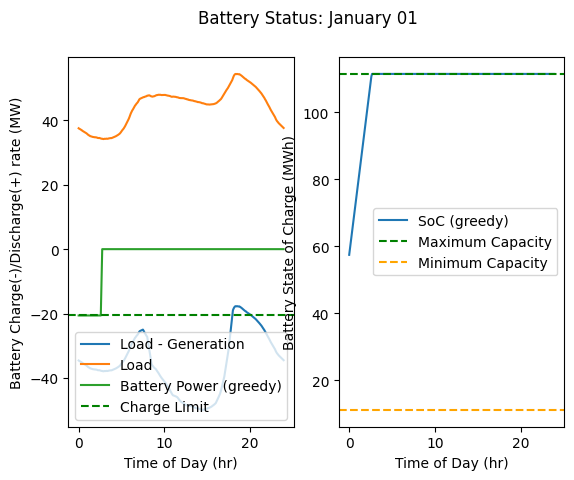

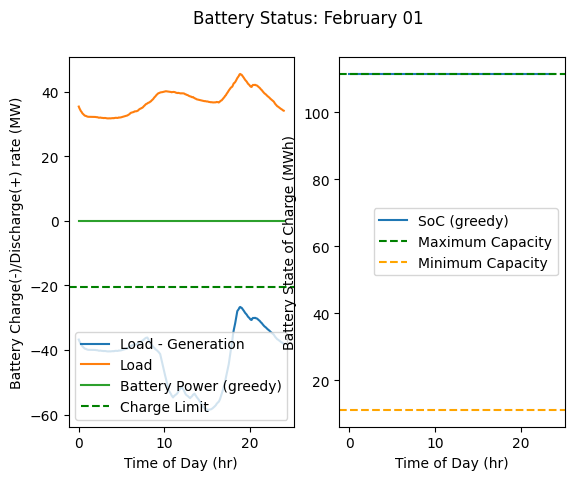

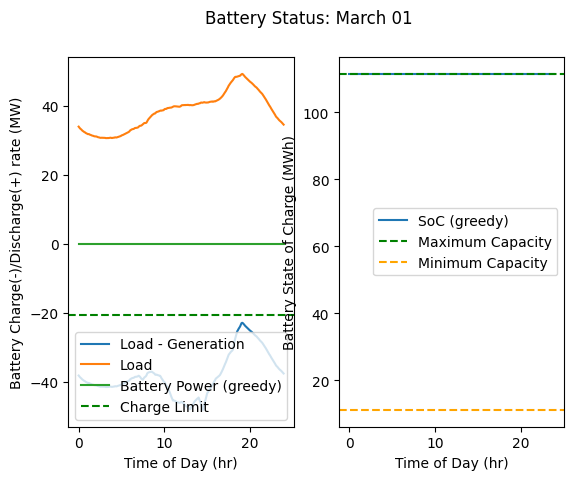

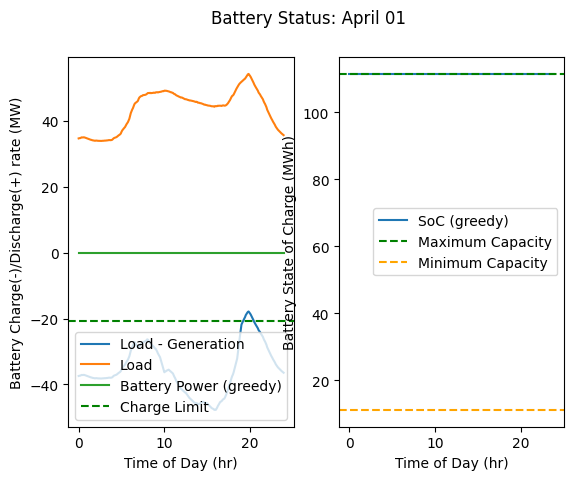

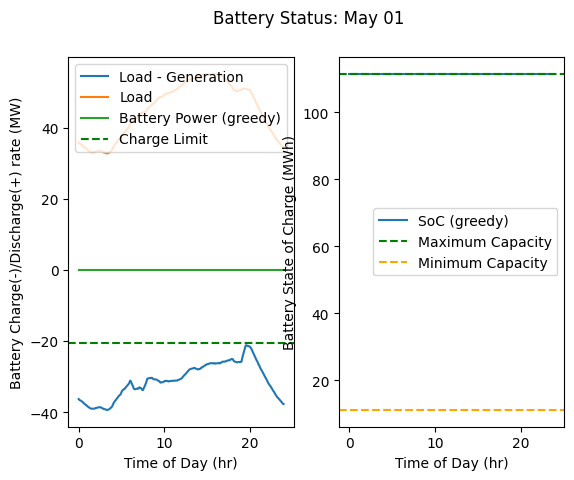

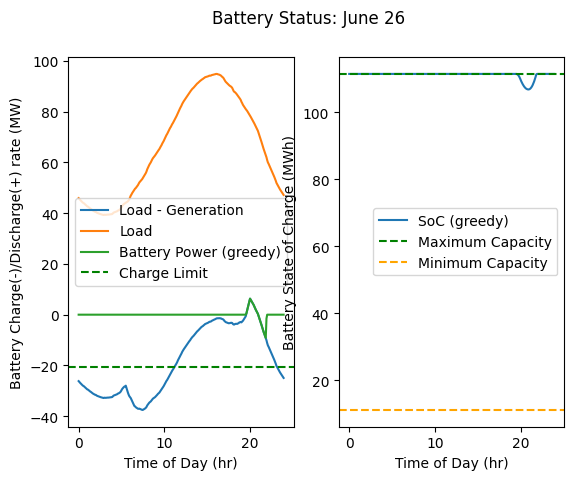

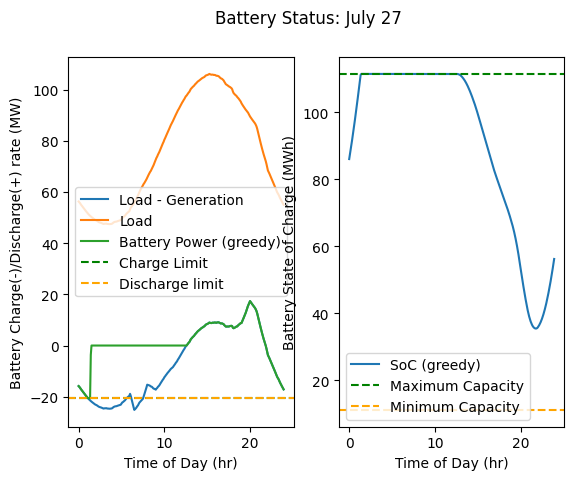

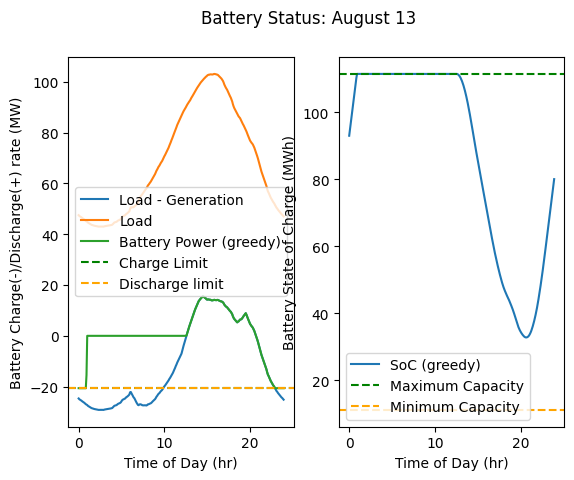

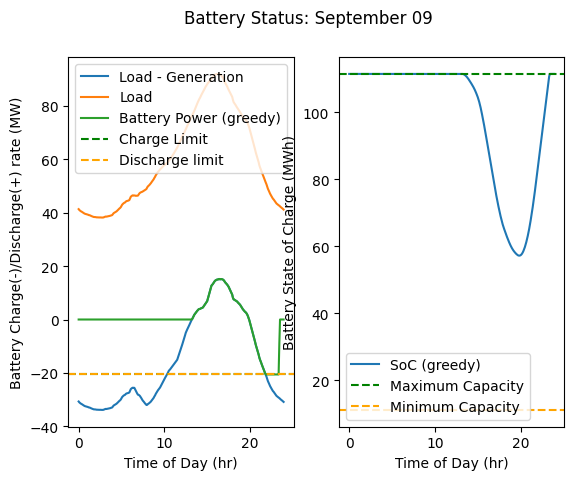

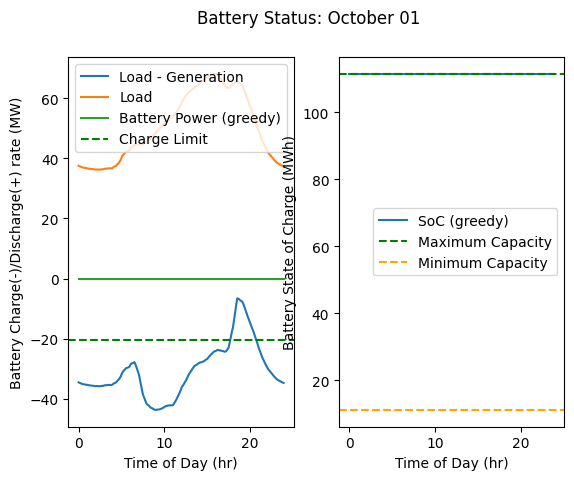

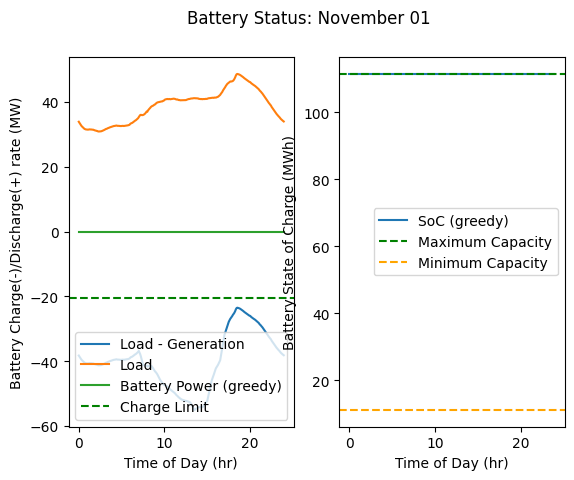

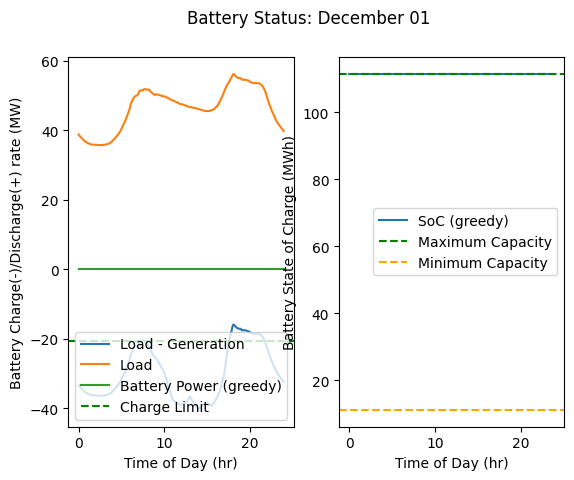

In [20]:
visualize.min_capacity_per_month(res, soc_per_day, u_batt_per_day, time_one_day, load_per_day,
                                 generation_per_day)

In [30]:
visualize.lp_versus_greedy_comparison(res, time_one_day, worst_load, worst_generation_pu,
                                      scenarios=['high_load_sunny'])

In [25]:
res.scenarios

['low_load_low_solar',
 'medium_load_low_solar',
 'medium_load_medium_solar',
 'high_load_cloudy',
 'high_load_sunny']

In [36]:
from renewableopt.optimal_design import SinglePeriodModel

In [37]:
help(SinglePeriodModel)

Help on class SinglePeriodModel in module renewableopt.optimal_design.single_period:

class SinglePeriodModel(builtins.object)
 |  SinglePeriodModel(initial_battery_charge, depth_of_discharge, cost_battery_energy, cost_solar)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, initial_battery_charge, depth_of_discharge, cost_battery_energy, cost_solar)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  minimize_cost(self, time, load, solar_pu)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [38]:
model = SinglePeriodModel(
    initial_battery_charge=0.5,
    depth_of_discharge=0.1,
    cost_battery_energy=100,
    cost_solar=50
)

In [23]:
model.minimize_cost(time, load, generation_pu[:, 0])

AttributeError: 'numpy.ndarray' object has no attribute 'keys'

In [19]:
res.E_max / res.P_battery

1.0529862514653137

In [21]:
set([1, 2, 3]) - set([2])

{1, 3}